In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import expanduser

# indep_kmeans, indep_hier, adapt_kmeans, adapt_hier

In [65]:
phonemes_by_kappa = ["b", "m", "B", "s", "D", "G", "w", "i", "y", "p", "r", "z", "t", "k", "rr", "a", "o", "l", "e", "n", "u", "c", "x", "d", "g", "N"]

In [44]:
experiments_dir = expanduser("~") + "/tesis/informe-pronunciation/experiments/"
base_dir = experiments_dir + "gmm_vs_supervectors/dev/"
eers_dir = base_dir + "eers/"
plots_dir = base_dir + 'plots/'
indep_kmeans_filename = eers_dir + "indep_kmeans_999k/all_eers"
indep_hier_filename = eers_dir + "indep_hierCOMP_50k/all_eers"
adapt_kmeans_filename = eers_dir + "adapt_kmeans_999k/all_eers"
adapt_hier_filename = eers_dir + "adapt_hierCOMP_25k/all_eers"

In [45]:
models_dict = {
    "indep_kmeans" : {},
    "indep_hier" : {},
    "adapt_kmeans" : {},
    "adapt_hier" : {}
}

In [46]:
def add_to_models_dict(model_key, filename):
    lines = []
    
    with open(filename, "r") as f:
        for line in f.readlines():
            lines.append(line.strip().split(":"))            
    
    lines_1 = [l[0] for l in lines]
    lines_2 = [float(l[1]) for l in lines]
    models_dict[model_key] = dict(zip(lines_1, lines_2))

In [47]:
add_to_models_dict("indep_kmeans", indep_kmeans_filename)
add_to_models_dict("indep_hier", indep_hier_filename)
add_to_models_dict("adapt_kmeans", adapt_kmeans_filename)
add_to_models_dict("adapt_hier", adapt_hier_filename)

In [48]:
base_matrix = np.array(phonemes_by_kappa).reshape(-1,1)

In [49]:
for key in models_dict.keys():
    results = [models_dict[key][p] for p in phonemes_by_kappa]
    results = np.array(results).reshape(-1,1)
    base_matrix = np.hstack((base_matrix, results))

In [50]:
dataframe = pd.DataFrame(base_matrix[:, 1:], index=phonemes_by_kappa, columns=models_dict.keys())

In [51]:
dataframe.to_csv(plots_dir + "gmm_models.csv", index_label="phones")

Al analizar estos resultados, selecciono Adapt Kmeans como método representativo. Adapt HIER tiene una performance levemente mejor, aunque la inicialización es n^2 y no escala con la cantidad de instancias

In [148]:
dataframe

,adapt_kmeans,indep_hier,indep_kmeans,adapt_hier
b,0.12760910816,0.150227617602,0.138257575756,0.129113924051
m,0.155976676385,0.17254174397,0.162472756093,0.154607297466
B,0.220701454234,0.226689478186,0.227160493827,0.210436270317
s,0.32724879333,0.339642620782,0.312243547319,0.305625413633
D,0.18152173913,0.183088070516,0.18804347826,0.185664509706
G,0.182306738322,0.175722543353,0.191907514451,0.180404354588
w,0.166890982504,0.179004037685,0.1806968856,0.165545087485
i,0.27140549273,0.272913944372,0.289105295191,0.269304450339
y,0.335507541786,0.353658536585,0.351406441094,0.33375918237
p,0.320379146919,0.361496680749,0.350652323186,0.317535545024


In [52]:
adapt_kmeans = dataframe["adapt_kmeans"].values
adapt_kmeans = np.array([np.float(x) for x in adapt_kmeans])
print "Adapt kmeans: " + str(np.mean(adapt_kmeans))

Adapt kmeans: 0.289004613541


In [53]:
indep_kmeans = dataframe["indep_kmeans"].values
indep_kmeans = np.array([np.float(x) for x in indep_kmeans])
print "Indep kmeans: " + str(np.mean(indep_kmeans))

Indep kmeans: 0.299345159811


In [54]:
indep_hier = dataframe["indep_hier"].values
indep_hier = np.array([np.float(x) for x in indep_hier])
print "Indep hier: " + str(np.mean(indep_hier))

Indep hier: 0.303344639664


In [55]:
adapt_hier = dataframe["adapt_hier"].values
adapt_hier = np.array([np.float(x) for x in adapt_hier])
print "adapt hier: " + str(np.mean(adapt_hier))

adapt hier: 0.285417244642


In [56]:
supervectors_dict = {
	"b": 0.122,
	"m": 0.154,
	"B": 0.206,
	"s": 0.319,
	"D": 0.182,
	"G": 0.162,
	"w": 0.151,
	"i": 0.254,
	"y": 0.338,
	"p": 0.295,
	"r": 0.317,
	"z": 0.222,
	"t": 0.295,
	"k": 0.341,
	"rr": 0.324,
	"a": 0.346,
	"o": 0.408,
	"l": 0.279,
	"e": 0.4,
	"n": 0.424,
	"u": 0.354,
	"c": 0.44,
	"x": 0.164,
	"d": 0.364,
	"g": 0.234,
	"N": 0.217
}

# Final plot

In [58]:
values_supervectors = np.array([supervectors_dict[p] for p in phonemes_by_kappa]).reshape(-1,1).astype(float)
values_gmm = np.array([models_dict["adapt_kmeans"][p] for p in phonemes_by_kappa]).reshape(-1,1).astype(float)

In [59]:
base_matrix = np.array(phonemes_by_kappa).reshape(-1,1)
base_matrix = np.column_stack((base_matrix, values_gmm))
base_matrix = np.column_stack((base_matrix, values_supervectors))

In [60]:
plot_dataframe = pd.DataFrame(base_matrix, columns=['phones', 'GMM', 'supervectors'])

In [61]:
df = pd.melt(plot_dataframe, id_vars="phones", var_name="model", value_name="EER")

In [62]:
df[['EER']] = df[['EER']].apply(pd.to_numeric)

In [63]:
output_filename = plots_dir + "gmm_supervectors_dev"

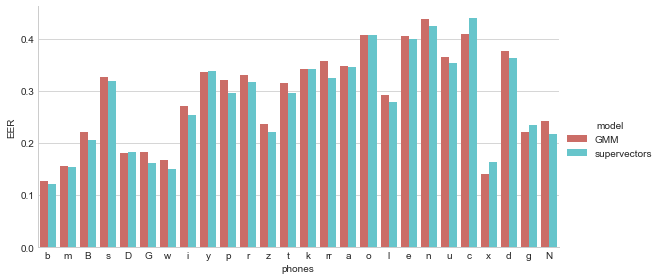

In [64]:
sns.set_style("whitegrid")
sns.factorplot(x='phones', y='EER', hue='model', data=df, kind='bar', size=4, aspect=2, palette="hls")
plt.savefig(output_filename)
plt.show()

## Plot first attempt

In [154]:
def plot_barplots(phonemes, title, filename=None):
    for p in phonemes:
        barplot_dicc[p]["supervectors"] = calculate_tuple(supervectors[p])
        barplot_dicc[p]["features_combination"] = calculate_tuple(features_combination[p])
        barplot_dicc[p]["score_combination"] = calculate_tuple(score_combination[p])
        
    min_yerr_supervectors = [barplot_dicc[p]["supervectors"]["min"] for p in phonemes]
    max_yerr_supervectors = [barplot_dicc[p]["supervectors"]["max"] for p in phonemes]

    min_yerr_features_combination = [barplot_dicc[p]["features_combination"]["min"] for p in phonemes]
    max_yerr_features_combination = [barplot_dicc[p]["features_combination"]["max"] for p in phonemes]

    min_yerr_score_combination = [barplot_dicc[p]["score_combination"]["min"] for p in phonemes]
    max_yerr_score_combination = [barplot_dicc[p]["score_combination"]["max"] for p in phonemes]
    
    barWidth = 0.4
    xs_1 = np.arange(len(phonemes)) * 1.6
    xs_2 = [x + barWidth for x in xs_1]
    xs_3 = [x + 2*barWidth for x in xs_1]

    ys_1 = [barplot_dicc[p]["supervectors"]["mean"] for p in phonemes]
    ys_2 = [barplot_dicc[p]["features_combination"]["mean"] for p in phonemes]
    ys_3 = [barplot_dicc[p]["score_combination"]["mean"] for p in phonemes]
    plt.bar(xs_1, ys_1, width=barWidth, color="blue", yerr=[min_yerr_supervectors, max_yerr_supervectors], capsize=2, label="supervectors")
    plt.bar(xs_2, ys_2, width=barWidth, color="violet", yerr=[min_yerr_features_combination, max_yerr_features_combination], capsize=2, label="features combination")
    plt.bar(xs_3, ys_3, width=barWidth, color="red", yerr=[min_yerr_score_combination, max_yerr_score_combination], capsize=2, label="score combination")
    plt.xticks(xs_2, phonemes)
    plt.legend(loc="lower left")
    plt.title(title)
    plt.savefig(filename)
    plt.show()

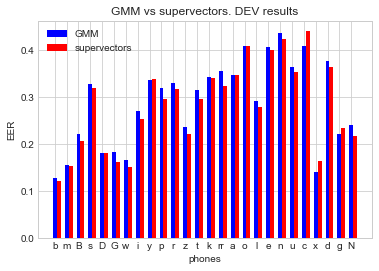

In [155]:
output_filename = "/Users/lmatayoshi/Documents/Projects/tesis_notebooks/results/gmm_vs_supervectors/dev/gmm/plots/dev_results"
title = "GMM vs supervectors. DEV results"

barWidth = 0.4
xs_1 = np.arange(len(phonemes_by_kappa)) * 1.2
xs_2 = [x + barWidth for x in xs_1]

values_supervectors = [supervectors_dict[p] for p in phonemes_by_kappa]
values_gmm = [models_dict['adapt_kmeans'][p] for p in phonemes_by_kappa]
plt.bar(xs_1, values_gmm, width=barWidth, color="blue", label="GMM")
plt.bar(xs_2, values_supervectors, width=barWidth, color="red", label="supervectors")
plt.legend()
plt.xticks(xs_1, phonemes_by_kappa)
plt.ylabel("EER")
plt.xlabel("phones")
plt.title(title)
plt.savefig(output_filename)
plt.show()